In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings

In [2]:
# Find Directory and Folders
Diri = "/glade/scratch/zarzycki/DCMIP_2016/"
Folders = ["fv3", "mpas", "icon", "gem", "nicam", "acme"]
Models = ["FV3", "MPAS", "ICON", "GEM", "NICAM", "ACME"]
#
# List Files
for i in range(len(Folders)):
    Files = os.listdir(Diri + Folders[i])
    print (Files)

['fv3.161-dry.r100.L30.interp_latlon.nonhydro_instant.nc', 'fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_average.nc', 'fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc']
['mpas.161.r100.L30.latlon.nonhydro.kessler.dcmip_physics.Bill.nc', 'mpas.161.r100.L30.latlon.nonhydro.dry.Bill.nc', 'mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc']
['icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.RHO.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.Q2.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.Z.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.RAIN_GSP.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.aw.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.RAIN_GSP.nc', 'icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.W.nc', 'icon.161.r100.L30.interp_latlon.nonhydro.P.nc', 'icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900

In [3]:
# Question 1 Dry
# Create Empty Arrays
Min_Pressure_Dry = numpy.zeros((6,31))
Max_Pressure_Dry = numpy.zeros((6,31))
#
# Find File Name
for i in range(len(Models)):
    Folder = Diri + Folders[i]
    if i == 0:
        Filename = '/fv3.161-dry.r100.L30.interp_latlon.nonhydro_instant.nc'
    if i == 1:
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.dry.Bill.nc'
    if i == 2:
        Filename = '/icon.161-dry.r100.L30.interp_latlon.nonhydro.dt300_dtchem900_dtcpl900_nophy.PS.nc'
    if i == 3:
        Filename = '/gem.161-dry.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if i == 4:
        Filename = '/nicam.161-dry.r100.L30.interp_latlon.nonhydro.PS.nc'
    if i == 5:
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.dry.PS.nc'
#
# Open Datasets
    Dry_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Dry_Data
#
# Open Pressure Variable
    if i != 5:
        Dry_Pressure = Dry_Data.PS
    else:
        Dry_Pressure = Dry_Data.ps
#
# Find Min Pressure
    for k in range(len(Dry_Pressure["time"])):
        Min_Pressure_Dry[i][k] = numpy.min(Dry_Pressure[k, :, :]) / 100.           
#
# Find Max Pressure
    for k in range(len(Dry_Pressure["time"])):
        Max_Pressure_Dry[i][k] = numpy.max(Dry_Pressure[k, :, :]) / 100.
print (Min_Pressure_Dry)
#print (Max_Pressure_Dry)

[[1000.          999.71359375  999.58460938  999.33375     998.81015625
   997.8065625   995.75273438  991.27296875  980.8628125   958.29507813
   941.176875    929.36890625  922.293125    903.8884375   888.88125
   884.8303125   874.01421875  871.33171875  872.79375     869.70929687
   870.99882813  873.28039062  874.01773438  866.41898438  862.9884375
   863.8646875   860.52664063  857.74078125  856.26023437  857.6834375
   854.97804688]
 [1000.          998.603125    998.82078125  998.72484375  998.50359375
   997.62523437  996.05304687  992.27390625  983.434375    962.75765625
   939.35507812  927.60609375  918.6359375   905.26679687  890.5190625
   889.95375     884.85601563  880.72679687  874.44703125  870.4934375
   879.45929687  874.97273437  875.414375    878.84164062  867.58828125
   866.16226563  864.33234375  864.50320313  863.36367188  863.12046875
   865.37335937]
 [1000.02710938  999.75164063  999.67734375  999.50351562  999.09960938
   998.29632812  996.56257812  992.81

In [6]:
# Question 1 Moist
# Create Empty Arrays
Min_Pressure_Moist = numpy.zeros((6,31))
Max_Pressure_Moist = numpy.zeros((6,31))
#
# Find File Name
for i in range(len(Models)):
    Folder = Diri + Folders[i]
    if i == 0:
        Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
    if i == 1:
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
    if i == 2:
        Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.PS.nc'
    if i == 3:
        Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if i == 4:
        Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.PS.nc'
    if i == 5:
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.PS.nc'
#
# Open Datasets
    Moist_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Moist_Data
#
# Open Pressure Variable
    if i != 5:
        Moist_Pressure = Moist_Data.PS
    else:
        Moist_Pressure = Moist_Data.ps
#
# Find Min Pressure
    for k in range(len(Moist_Pressure["time"])):
        Min_Pressure_Moist[i][k] = numpy.min(Moist_Pressure[k, :, :]) / 100.
            
#
# Find Max Pressure
    for k in range(len(Moist_Pressure["time"])):
        Max_Pressure_Moist[i][k] = numpy.max(Moist_Pressure[k, :, :]) / 100.
print (Min_Pressure_Moist)
#print (Max_Pressure_Moist)

[[1000.          999.71460938  999.58664062  999.33664062  998.81398438
   997.81132813  995.75804687  991.17804687  977.1040625   952.72476563
   939.62789062  928.848125    921.06195312  905.36679687  901.82757812
   896.3059375   893.39960937  877.001875    878.5659375   878.68914063
   886.50828125  874.94851563  869.98523438  867.605       869.98570312
   873.67664063  876.6034375   870.99164062  869.0478125   878.34234375
   878.73125   ]
 [1000.          998.59976563  998.8178125   998.71710937  998.50835938
   997.639375    996.09601562  992.21882812  981.11046875  951.310625
   932.65171875  919.81304688  911.12078125  892.92242188  884.1671875
   876.10492187  873.553125    882.72359375  866.73859375  860.75960937
   858.6928125   858.54171875  870.17601562  879.18335938  873.43375
   876.56671875  882.43375     872.92328125  865.47429688  862.88625
   861.0978125 ]
 [1000.02710938  999.891875    999.81875     999.64625     999.24273438
   998.4409375   996.70617187  992.8232

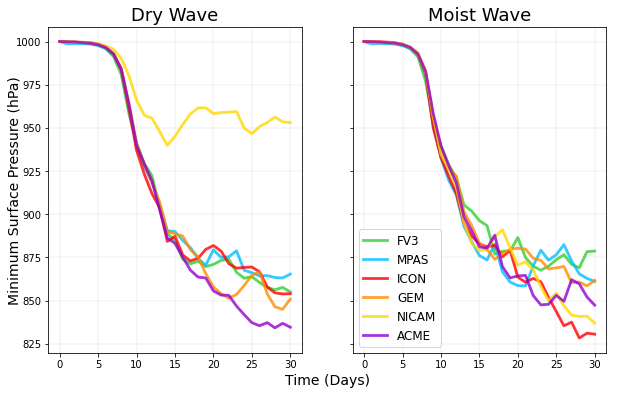

In [205]:
# Question 1
# Plot Min Pressure for Dry and Moist Waves
Fig = pyplot.figure(figsize=(10,6))
Axes = Fig.subplots(1,2,sharey=True)
for i in range(2):
    Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
    for k in range(len(Models)):
        if i == 0:
            Axes[i].plot(Dry_Pressure["time"], Min_Pressure_Dry[k], c=Colours[k], label=Models[k], \
            linewidth=2.8, alpha=0.8)
        if i == 1:
            Axes[i].plot(Moist_Pressure["time"], Min_Pressure_Moist[k], c=Colours[k], label=Models[k], \
            linewidth=2.8, alpha=0.8)
    Axes[i].grid('grid', linestyle="-", linewidth=0.25, color='silver')
    if i == 0:
        Axes[i].set_title('Dry Wave', fontsize=18)
    else:
        Axes[i].set_title('Moist Wave', fontsize=18)
        Axes[i].legend(loc=3, fontsize=12)
Fig.add_subplot(111, frameon=False)
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.xlabel('Time (Days)', fontsize=14)
pyplot.ylabel('Minimum Surface Pressure (hPa)', fontsize=14)
pyplot.savefig('Q1_Min.png', bbox_inches='tight')

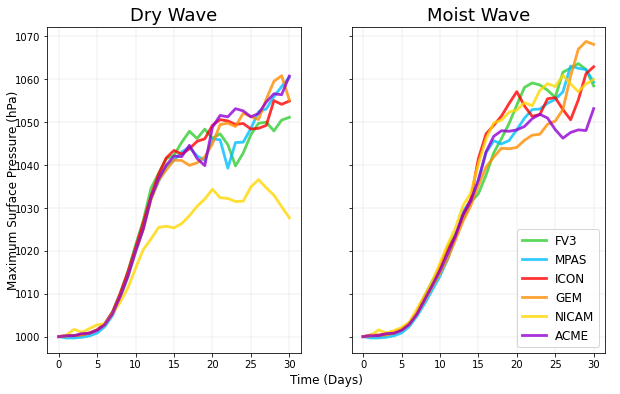

In [207]:
# Question 1
# Plot Max Pressure for Dry and Moist Waves
Fig = pyplot.figure(figsize=(10,6))
Axes = Fig.subplots(1,2,sharey=True)
for i in range(2):
    Colours = ['limegreen', 'deepskyblue', 'red', 'darkorange', 'gold', 'darkviolet']
    for k in range(len(Models)):
        if i == 0:
            Axes[i].plot(Dry_Pressure["time"], Max_Pressure_Dry[k], c=Colours[k], label=Models[k], \
            linewidth=2.8, alpha=0.8)
        if i == 1:
            Axes[i].plot(Moist_Pressure["time"], Max_Pressure_Moist[k], c=Colours[k], label=Models[k], \
            linewidth=2.8, alpha=0.8)
    Axes[i].grid('grid', linestyle="-", linewidth=0.25, color='silver')
    if i == 0:
        Axes[i].set_title('Dry Wave', fontsize=18)
    else:
        Axes[i].set_title('Moist Wave', fontsize=18)
        Axes[i].legend(loc=4, fontsize=12)
Fig.add_subplot(111, frameon=False)
pyplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pyplot.xlabel('Time (Days)', fontsize=12)
pyplot.ylabel('Maximum Surface Pressure (hPa)', fontsize=12)
pyplot.savefig('Q1_Max.png', bbox_inches='tight')

In [9]:
# Question 2
# Create Function to Find Pressure at Day 10
def Pressure_Day_10(Model, Model_Num):
# Find File Name
    Folder = Diri + Folders[Model_Num]
    if Model == "FV3":
        Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
    if Model == "MPAS":
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
    if Model == "ICON":
        Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.PS.nc'
    if Model == "GEM":
        Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if Model == "NICAM":
        Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.PS.nc'
    if Model == "ACME":
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.PS.nc'
#
# Open Datasets
    Moist_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Moist_Data
#
# Open Pressure Variable
    if Model != "ACME":
        Moist_Pressure = Moist_Data.PS
    else:
        Moist_Pressure = Moist_Data.ps
#
# Find Pressure at Day 10
    Moist_Pressure_10 = Moist_Pressure[10,:,:] / 100.
    return (Moist_Pressure_10)

In [10]:
Pressure_Day_10("MPAS", 1)

<xarray.DataArray 'PS' (lat: 181, lon: 360)>
array([[998.7266 , 998.7266 , 998.7266 , ..., 998.7266 , 998.7266 ,
        998.7266 ],
       [998.7291 , 998.72906, 998.729  , ..., 998.7293 , 998.72925,
        998.72925],
       [998.7322 , 998.7321 , 998.73193, ..., 998.7326 , 998.7324 ,
        998.73236],
       ...,
       [999.73584, 999.73773, 999.7397 , ..., 999.7304 , 999.7322 ,
        999.734  ],
       [999.8181 , 999.8192 , 999.8204 , ..., 999.81494, 999.8159 ,
        999.817  ],
       [999.90393, 999.90393, 999.90393, ..., 999.90393, 999.90393,
        999.90393]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     float32 10.0

FV3
MPAS
ICON
GEM
NICAM
ACME


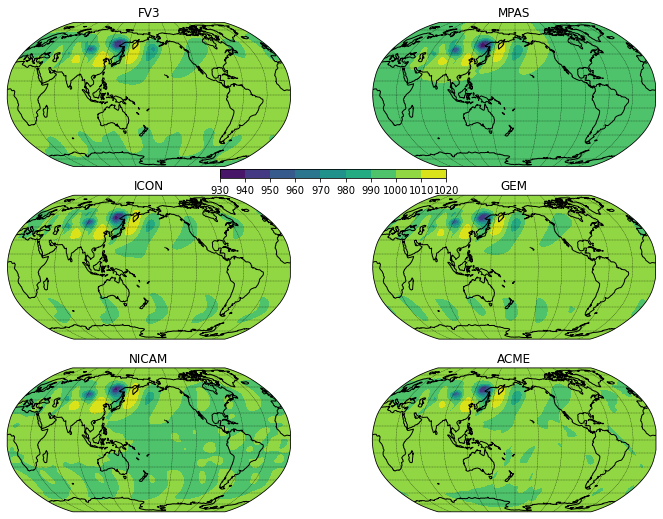

In [12]:
# Question 2
# Plot Surface Pressure at Day 10
Fig = pyplot.figure(figsize=(12,9))
Count = 0
for Model in list(Models):
    print (Model)
    Count += 1
    Axes = Fig.add_subplot(3,2, Count, projection=ccrs.Robinson(central_longitude=180))
#
# Draw Coastlines
    Axes.coastlines()
#
# Define Colour Levels
    Colour_Levels = numpy.arange(930,1030,10)
#
# Use Function to Find Pressure at Day 10
    Moist_Pressure_10 = Pressure_Day_10(Model, Count-1)
#
# Plot Colour Contour
    Colour_Plot = Axes.contourf(Moist_Pressure_10.lon, Moist_Pressure_10.lat, Moist_Pressure_10, \
    cmap='viridis', levels=Colour_Levels, transform=ccrs.PlateCarree())
    pyplot.title(Model, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-180,180,30)
    y_Axis = numpy.arange(-90,90,15)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Colour_Bar
    if Model == "FV3":
        Cax = Axes.inset_axes([0.75, -0.08, 0.8, 0.06], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
Fig.savefig('Q2.png', bbox_inches='tight')

In [13]:
# Question 4
# Assume Average Temperature and Surface Pressure
P0 = 1013
T_Ave = 287
Scale_Height = 8500
# Find Pressure Level of 500m
Pressure_500m = P0 * numpy.exp(-500/Scale_Height)
print (Pressure_500m)
# Use Pressure Level Closest to 955hPa

955.1304947249884


In [14]:
# Question 4
# FV3
Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
Moist_Data = xr.open_dataset(Diri + '/fv3' + Filename, decode_times=False)
# Find Pressure Level of 500m
Moist_Data.U[10,27,:,:]

<xarray.DataArray 'U' (lat: 361, lon: 720)>
[259920 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    pfull    float64 957.5
    time     float64 10.0
Attributes:
    long_name:     zonal wind
    units:         m/sec
    valid_range:   [-330.  330.]
    cell_methods:  time: point

In [15]:
# Question 4
# Define Lat and Long Distances
Lat_Dist = 110948
def Long_Dist(Long1_Deg, Long2_Deg, Lat_Deg):
    Long1 = float(Long1_Deg * numpy.pi / 180.)
    Long2 = float(Long2_Deg * numpy.pi / 180.)
    Lat = float(Lat_Deg * numpy.pi / 180.)
    Long_Dist = numpy.cos(Lat) * numpy.cos(Lat) * (numpy.sin((Long2-Long1)/2)) * 2 * 6378000
    return (Long_Dist)

In [24]:
# Question 4
# Open FV3 File
Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
FV3_Moist_Data = xr.open_dataset(Diri + '/fv3' + Filename, decode_times=False)
FV3_U = FV3_Moist_Data.U[10,27,:,:]
FV3_V = FV3_Moist_Data.V[10,27,:,:]
FV3_U
#
# Calculate Vorticity
FV3_Vort = numpy.zeros((len(FV3_U.lat), len(FV3_U.lon)))
for i in range(len(FV3_U.lon)):
    for j in range(len(FV3_U.lat)):
        if j == 0 or j == len(FV3_U.lat)-1:
            FV3_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(FV3_U.lon)-1:
                dy = float((FV3_U.lat[j+1] - FV3_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(FV3_V.lon[i+1], FV3_V.lon[i-1], FV3_V.lat[j])
                du = FV3_U[j+1,i] - FV3_U[j-1,i]
                dv = FV3_V[j,i+1] - FV3_V[j,i-1]
            elif i == 0:
                dy = float((FV3_U.lat[j+1] - FV3_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(FV3_V.lon[i+2], FV3_V.lon[i], FV3_V.lat[j])
                du = FV3_U[j+1,i] - FV3_U[j-1,i]
                dv = FV3_V[j,i+1] - FV3_V[j,len(FV3_U.lon)-1]
            elif i == len(FV3_U.lon)-1:
                dy = float((FV3_U.lat[j+1] - FV3_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(FV3_V.lon[i], FV3_V.lon[i-2], FV3_V.lat[j])
                du = FV3_U[j+1,i] - FV3_U[j-1,i]
                dv = FV3_V[j,0] - FV3_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            FV3_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(FV3_V.lon[i]), float(FV3_U.lat[j]), FV3_Vort[j][i])
    print (i)
FV3_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [ -1.34873035,  -1.34456894,  -1.34030417, ...,  -1.36056831,
         -1.35672935,  -1.35278428],
       [ -0.53169341,  -0.53251389,  -0.53337474, ...,  -0.52947846,
         -0.53017501,  -0.53091333],
       ...,
       [-21.09622191, -21.13671139, -21.17905145, ..., -20.98608039,
        -21.02088407, -21.05758338],
       [-53.29557509, -53.06263477, -52.82617168, ..., -53.97396369,
        -53.75123944, -53.52516854],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [17]:
# Question 4
# MPAS
Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
Moist_Data = xr.open_dataset(Diri + '/mpas' + Filename, decode_times=False)
# Find Pressure Level of 500m
Moist_Data.P[0,2,:,:]

<xarray.DataArray 'P' (lat: 181, lon: 360)>
array([[95561.3  , 95561.3  , 95561.3  , ..., 95561.3  , 95561.3  , 95561.3  ],
       [95561.31 , 95561.31 , 95561.31 , ..., 95561.31 , 95561.31 , 95561.31 ],
       [95561.414, 95561.414, 95561.414, ..., 95561.414, 95561.414, 95561.414],
       ...,
       [95561.42 , 95561.42 , 95561.42 , ..., 95561.42 , 95561.42 , 95561.42 ],
       [95561.32 , 95561.32 , 95561.32 , ..., 95561.32 , 95561.32 , 95561.32 ],
       [95561.3  , 95561.3  , 95561.3  , ..., 95561.3  , 95561.3  , 95561.3  ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     float32 0.0
Attributes:
    units:      Pa
    long_name:  Pressure

In [18]:
# Question 4
# Open MPAS File
Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
MPAS_Moist_Data = xr.open_dataset(Diri + '/mpas' + Filename, decode_times=False)
MPAS_U = MPAS_Moist_Data.U[10,2,:,:]
MPAS_V = MPAS_Moist_Data.V[10,2,:,:]
MPAS_U
#
# Calculate Vorticity
MPAS_Vort = numpy.zeros((len(MPAS_U.lat), len(MPAS_U.lon)))
for i in range(len(MPAS_U.lon)):
    for j in range(len(MPAS_U.lat)):
        if j == 0 or j == len(MPAS_U.lat)-1:
            MPAS_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(MPAS_U.lon)-1:
                dy = float((MPAS_U.lat[j+1] - MPAS_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(MPAS_V.lon[i+1], MPAS_V.lon[i-1], MPAS_V.lat[j])
                du = MPAS_U[j+1,i] - MPAS_U[j-1,i]
                dv = MPAS_V[j,i+1] - MPAS_V[j,i-1]
            elif i == 0:
                dy = float((MPAS_U.lat[j+1] - MPAS_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(MPAS_V.lon[i+2], MPAS_V.lon[i], MPAS_V.lat[j])
                du = MPAS_U[j+1,i] - MPAS_U[j-1,i]
                dv = MPAS_V[j,i+1] - MPAS_V[j,len(MPAS_U.lon)-1]
            elif i == len(MPAS_U.lon)-1:
                dy = float((MPAS_U.lat[j+1] - MPAS_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(MPAS_V.lon[i], MPAS_V.lon[i-2], MPAS_V.lat[j])
                du = MPAS_U[j+1,i] - MPAS_U[j-1,i]
                dv = MPAS_V[j,0] - MPAS_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            MPAS_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(MPAS_V.lon[i]), float(MPAS_U.lat[j]), MPAS_Vort[j][i])
    print (i)
MPAS_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [ -0.31626432,  -0.31552667,  -0.31469203, ...,  -0.31789519,
         -0.31744892,  -0.31690529],
       [ -0.10610988,  -0.10565666,  -0.10516919, ...,  -0.10726323,
         -0.10691325,  -0.10652886],
       ...,
       [ -3.80844463,  -3.82910279,  -3.84863063, ...,  -3.73972632,
         -3.76374493,  -3.78665119],
       [-21.65365211, -21.65570577, -21.6513045 , ..., -21.60856029,
        -21.63004678, -21.64509925],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [25]:
# Question 4
# ICON
Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.P.nc'
Moist_Data = xr.open_dataset(Diri + '/icon' + Filename, decode_times=False)
# Find Pressure Level of 500m
Moist_Data.P[0,28,:,:]

<xarray.DataArray 'P' (lat: 181, lon: 360)>
array([[96519.67, 96519.67, 96519.67, ..., 96519.67, 96519.67, 96519.67],
       [96519.68, 96519.68, 96519.68, ..., 96519.68, 96519.68, 96519.68],
       [96519.75, 96519.75, 96519.75, ..., 96519.75, 96519.75, 96519.75],
       ...,
       [96519.75, 96519.75, 96519.75, ..., 96519.75, 96519.75, 96519.75],
       [96519.68, 96519.68, 96519.68, ..., 96519.68, 96519.68, 96519.68],
       [96519.67, 96519.67, 96519.67, ..., 96519.67, 96519.67, 96519.67]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lev      float64 29.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     float64 0.0
Attributes:
    standard_name:  air_pressure
    long_name:      Pressure
    units:          Pa
    param:          0.3.0

In [26]:
# Question 4
# Open ICON File
Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.U.nc'
ICON_U = xr.open_dataset(Diri + '/icon' + Filename, decode_times=False).U[10,28,:,:]
Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.V.nc'
ICON_V = xr.open_dataset(Diri + '/icon' + Filename, decode_times=False).V[10,28,:,:]
ICON_U
#
# Calculate Vorticity
ICON_Vort = numpy.zeros((len(ICON_U.lat), len(ICON_U.lon)))
for i in range(len(ICON_U.lon)):
    for j in range(len(ICON_U.lat)):
        if j == 0 or j == len(ICON_U.lat)-1:
            ICON_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(ICON_U.lon)-1:
                dy = float((ICON_U.lat[j+1] - ICON_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ICON_V.lon[i+1], ICON_V.lon[i-1], ICON_V.lat[j])
                du = ICON_U[j+1,i] - ICON_U[j-1,i]
                dv = ICON_V[j,i+1] - ICON_V[j,i-1]
            elif i == 0:
                dy = float((ICON_U.lat[j+1] - ICON_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ICON_V.lon[i+2], ICON_V.lon[i], ICON_V.lat[j])
                du = ICON_U[j+1,i] - ICON_U[j-1,i]
                dv = ICON_V[j,i+1] - ICON_V[j,len(ICON_U.lon)-1]
            elif i == len(ICON_U.lon)-1:
                dy = float((ICON_U.lat[j+1] - ICON_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ICON_V.lon[i], ICON_V.lon[i-2], ICON_V.lat[j])
                du = ICON_U[j+1,i] - ICON_U[j-1,i]
                dv = ICON_V[j,0] - ICON_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            ICON_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(ICON_V.lon[i]), float(ICON_U.lat[j]), ICON_Vort[j][i])
    print (i)
ICON_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [  0.48504802,   0.48723965,  -0.556687  , ...,  -0.57132347,
         -0.5675709 ,  -0.56360563],
       [ -0.21724674,  -0.21649134,  -0.15254856, ...,  -0.15440526,
         -0.15445623,  -0.15447211],
       ...,
       [ -4.82754869,  -5.08846811,  -4.5752569 , ...,  -4.74393283,
         -4.72906888,  -4.39338974],
       [-18.96928393, -18.79532183, -18.61491986, ..., -19.46458609,
        -19.30507503, -19.14042691],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [27]:
# Question 4
# GEM
Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.u.nc'
Moist_Data = xr.open_dataset(Diri + '/gem' + Filename, decode_times=False)
# Find Pressure Level of 500m
Moist_Data.U[10,27,:,:]

<xarray.DataArray 'U' (lat: 181, lon: 360)>
array([[ 0.004906,  0.004851,  0.004794, ...,  0.005062,  0.005011,  0.004959],
       [ 0.008089,  0.008043,  0.007997, ...,  0.008231,  0.008183,  0.008136],
       [ 0.012847,  0.012802,  0.01276 , ...,  0.013003,  0.012948,  0.012896],
       ...,
       [-0.309523, -0.306502, -0.303385, ..., -0.318019, -0.315281, -0.312449],
       [-0.323981, -0.320188, -0.316295, ..., -0.334761, -0.331268, -0.327675],
       [-0.336859, -0.332243, -0.327526, ..., -0.350086, -0.345782, -0.341373]],
      dtype=float32)
Coordinates:
    ilev     float64 957.5
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     float64 10.0
Attributes:
    units:      m/s
    long_name:  Zonal wind

In [29]:
# Question 4
# GEM
Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.u.nc'
GEM_U = xr.open_dataset(Diri + '/gem' + Filename, decode_times=False).U[10,27,:,:]
Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.v.nc'
GEM_V = xr.open_dataset(Diri + '/gem' + Filename, decode_times=False).V[10,27,:,:]
GEM_U
#
# Calculate Vorticity
GEM_Vort = numpy.zeros((len(GEM_U.lat), len(GEM_U.lon)))
for i in range(len(GEM_U.lon)):
    for j in range(len(GEM_U.lat)):
        if j == 0 or j == len(GEM_U.lat)-1:
            GEM_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(GEM_U.lon)-1:
                dy = float((GEM_U.lat[j+1] - GEM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(GEM_V.lon[i+1], GEM_V.lon[i-1], GEM_V.lat[j])
                du = GEM_U[j+1,i] - GEM_U[j-1,i]
                dv = GEM_V[j,i+1] - GEM_V[j,i-1]
            elif i == 0:
                dy = float((GEM_U.lat[j+1] - GEM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(GEM_V.lon[i+2], GEM_V.lon[i], GEM_V.lat[j])
                du = GEM_U[j+1,i] - GEM_U[j-1,i]
                dv = GEM_V[j,i+1] - GEM_V[j,len(GEM_U.lon)-1]
            elif i == len(GEM_U.lon)-1:
                dy = float((GEM_U.lat[j+1] - GEM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(GEM_V.lon[i], GEM_V.lon[i-2], GEM_V.lat[j])
                du = GEM_U[j+1,i] - GEM_U[j-1,i]
                dv = GEM_V[j,0] - GEM_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            GEM_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(GEM_V.lon[i]), float(GEM_U.lat[j]), GEM_Vort[j][i])
    print (i)
GEM_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-9.45688948e-02, -9.76639254e-02, -9.62443578e-02, ...,
        -9.55050001e-02, -9.35165795e-02, -9.16727830e-02],
       [ 1.21979164e-02,  1.13737783e-02,  1.15684968e-02, ...,
         1.17136087e-02,  1.23660350e-02,  1.29062297e-02],
       ...,
       [-4.19037413e+00, -4.17228179e+00, -4.15190227e+00, ...,
        -4.24066462e+00, -4.22455070e+00, -4.20734969e+00],
       [-1.71239026e+01, -1.69730998e+01, -1.68145644e+01, ...,
        -1.75528652e+01, -1.74138064e+01, -1.72697644e+01],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

In [30]:
# Question 4
# NICAM
Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.U.nc'
Moist_Data = xr.open_dataset(Diri + '/nicam' + Filename, decode_times=False)
# Find Height Level of 500m
Moist_Data.U[10,2,:,:]

<xarray.DataArray 'U' (lat: 180, lon: 360)>
array([[ 0.011174,  0.011138,  0.011101, ...,  0.011275,  0.011243,  0.011209],
       [ 0.021248,  0.021139,  0.021111, ...,  0.021564,  0.021452,  0.021353],
       [ 0.038872,  0.038796,  0.038703, ...,  0.039002,  0.038976,  0.038932],
       ...,
       [-0.309119, -0.305505, -0.301919, ..., -0.313216, -0.312284, -0.311379],
       [-0.340842, -0.335894, -0.33096 , ..., -0.345421, -0.344572, -0.343735],
       [-0.36651 , -0.361524, -0.356544, ..., -0.367714, -0.368228, -0.368745]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    lev      float64 541.9
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     float64 1.44e+04
Attributes:
    long_name:  Zonal wind
    units:      m/s

In [31]:
# Question 4
# NICAM
Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.U.nc'
NICAM_U = xr.open_dataset(Diri + '/nicam' + Filename, decode_times=False).U[10,2,:,:]
Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.V.nc'
NICAM_V = xr.open_dataset(Diri + '/nicam' + Filename, decode_times=False).V[10,2,:,:]
NICAM_U
#
# Calculate Vorticity
NICAM_Vort = numpy.zeros((len(NICAM_U.lat), len(NICAM_U.lon)))
for i in range(len(NICAM_U.lon)):
    for j in range(len(NICAM_U.lat)):
        if j == 0 or j == len(NICAM_U.lat)-1:
            NICAM_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(NICAM_U.lon)-1:
                dy = float((NICAM_U.lat[j+1] - NICAM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(NICAM_V.lon[i+1], NICAM_V.lon[i-1], NICAM_V.lat[j])
                du = NICAM_U[j+1,i] - NICAM_U[j-1,i]
                dv = NICAM_V[j,i+1] - NICAM_V[j,i-1]
            elif i == 0:
                dy = float((NICAM_U.lat[j+1] - NICAM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(NICAM_V.lon[i+2], NICAM_V.lon[i], NICAM_V.lat[j])
                du = NICAM_U[j+1,i] - NICAM_U[j-1,i]
                dv = NICAM_V[j,i+1] - NICAM_V[j,len(NICAM_U.lon)-1]
            elif i == len(NICAM_U.lon)-1:
                dy = float((NICAM_U.lat[j+1] - NICAM_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(NICAM_V.lon[i], NICAM_V.lon[i-2], NICAM_V.lat[j])
                du = NICAM_U[j+1,i] - NICAM_U[j-1,i]
                dv = NICAM_V[j,0] - NICAM_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            NICAM_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(NICAM_V.lon[i]), float(NICAM_U.lat[j]), NICAM_Vort[j][i])
    print (i)
NICAM_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.28878795, -0.28444976, -0.28224875, ..., -0.06846454,
        -0.2084215 , -0.29725968],
       [-0.08612271, -0.08184279, -0.07749226, ..., -0.09875336,
        -0.09458257, -0.09036989],
       ...,
       [-2.79639866, -2.71385895, -2.72672984, ..., -3.04106966,
        -3.05649854, -2.97477767],
       [-7.31783982, -6.75998376, -6.78244401, ..., -8.97994344,
        -9.01076527, -8.45646562],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [32]:
# Question 4
# ACME
Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.U.nc'
Moist_Data = xr.open_dataset(Diri + '/acme' + Filename, decode_times=False)
# Find Pressure Level of 500m
Moist_Data.u[10,27,:,:]

<xarray.DataArray 'u' (lat: 181, lon: 360)>
array([[ 0.013583,  0.013396,  0.013207, ...,  0.014081,  0.013919,  0.013753],
       [ 0.019908,  0.019674,  0.019438, ...,  0.020483,  0.020296,  0.020105],
       [ 0.027816,  0.027551,  0.027285, ...,  0.028428,  0.02823 ,  0.028026],
       ...,
       [-0.346973, -0.345953, -0.344752, ..., -0.352436, -0.350745, -0.348924],
       [-0.369712, -0.367607, -0.36534 , ..., -0.377515, -0.375043, -0.372442],
       [-0.383592, -0.380447, -0.377167, ..., -0.393393, -0.390245, -0.386978]])
Coordinates:
  * lat      (lat) float64 -89.24 -88.26 -87.27 -86.28 ... 87.27 88.26 89.24
    lev      float64 0.9575
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     float64 10.0
Attributes:
    long_name:  longitudinal wind component
    units:      meters/second

In [34]:
# Question 4
# ACME
Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.U.nc'
ACME_U = xr.open_dataset(Diri + '/acme' + Filename, decode_times=False).u[10,27,:,:]
Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.V.nc'
ACME_V = xr.open_dataset(Diri + '/acme' + Filename, decode_times=False).v[10,27,:,:]
ACME_U
#
# Calculate Vorticity
ACME_Vort = numpy.zeros((len(ACME_U.lat), len(ACME_U.lon)))
for i in range(len(ACME_U.lon)):
    for j in range(len(ACME_U.lat)):
        if j == 0 or j == len(ACME_U.lat)-1:
            ACME_Vort[j][i] = numpy.nan
        else:
            if i != 0 and i != len(ACME_U.lon)-1:
                dy = float((ACME_U.lat[j+1] - ACME_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ACME_V.lon[i+1], ACME_V.lon[i-1], ACME_V.lat[j])
                du = ACME_U[j+1,i] - ACME_U[j-1,i]
                dv = ACME_V[j,i+1] - ACME_V[j,i-1]
            elif i == 0:
                dy = float((ACME_U.lat[j+1] - ACME_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ACME_V.lon[i+2], ACME_V.lon[i], ACME_V.lat[j])
                du = ACME_U[j+1,i] - ACME_U[j-1,i]
                dv = ACME_V[j,i+1] - ACME_V[j,len(ACME_U.lon)-1]
            elif i == len(ACME_U.lon)-1:
                dy = float((ACME_U.lat[j+1] - ACME_U.lat[j-1]) * Lat_Dist)
                dx = Long_Dist(ACME_V.lon[i], ACME_V.lon[i-2], ACME_V.lat[j])
                du = ACME_U[j+1,i] - ACME_U[j-1,i]
                dv = ACME_V[j,0] - ACME_V[j,i-1]
            dvdx = dv / dx
            dudy = du / dy
            ACME_Vort[j][i] = (dvdx - dudy) * 10**5
#        print (i, j, float(ACME_V.lon[i]), float(ACME_U.lat[j]), ACME_Vort[j][i])
    print (i)
ACME_Vort

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.17914496, -0.16144622, -0.15784077, ..., -0.20610211,
        -0.20176253, -0.19729984],
       [-0.08094984, -0.07077546, -0.07036728, ..., -0.09537827,
        -0.09365631, -0.0918484 ],
       ...,
       [-2.60519281, -2.88524181, -2.86749811, ..., -2.37065203,
        -2.35028557, -2.32810697],
       [-6.7433161 , -7.18931981, -7.14737998, ..., -6.40421456,
        -6.35570292, -6.30394468],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

FV3
MPAS
ICON
GEM
NICAM
ACME


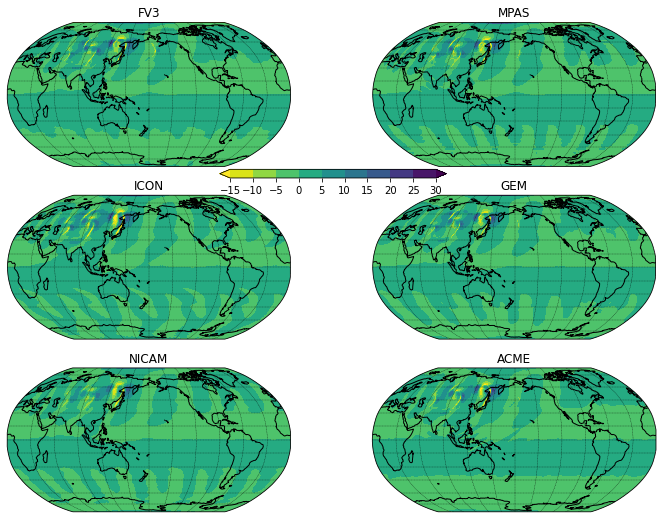

In [45]:
# Question 4
# Plot 500m Vorticity at Day 10
Fig = pyplot.figure(figsize=(12,9))
Count = 0
for Model in list(Models):
    print (Model)
    Count += 1
    Axes = Fig.add_subplot(3,2, Count, projection=ccrs.Robinson(central_longitude=180))
#
# Draw Coastlines
    Axes.coastlines()
#
# Define Colour Levels
    Colour_Levels = numpy.arange(-15,35,5)
#
# Plot Colour Contour
    if Model == "FV3":
        Colour_Plot = Axes.contourf(FV3_U.lon, FV3_U.lat, FV3_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    if Model == "MPAS":
        Colour_Plot = Axes.contourf(MPAS_U.lon, MPAS_U.lat, MPAS_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    if Model == "ICON":
        Colour_Plot = Axes.contourf(ICON_U.lon, ICON_U.lat, ICON_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    if Model == "GEM":
        Colour_Plot = Axes.contourf(GEM_U.lon, GEM_U.lat, GEM_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    if Model == "NICAM":
        Colour_Plot = Axes.contourf(NICAM_U.lon, NICAM_U.lat, NICAM_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    if Model == "ACME":
        Colour_Plot = Axes.contourf(ACME_U.lon, ACME_U.lat, ACME_Vort, \
        cmap='viridis_r', levels=Colour_Levels, extend='both', transform=ccrs.PlateCarree())
    pyplot.title(Model, fontsize=12)
#
# Set Axis Labels
    x_Axis = numpy.arange(-180,180,30)
    y_Axis = numpy.arange(-90,90,15)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Cfolour_Bar
    if Model == "FV3":
        Cax = Axes.inset_axes([0.75, -0.08, 0.8, 0.06], transform=Axes.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
Fig.savefig('Q4.png', bbox_inches='tight')

In [217]:
# Question 5
# Create Function to Find Location of Pressure Minimum
def Min_Pressure_Location(Model, Model_Num):
# Find File Name
    Folder = Diri + Folders[Model_Num]
    if Model == "FV3":
        Filename = '/fv3.161-preciponly.r100.L30.interp_latlon.nonhydro_instant.nc'
    if Model == "MPAS":
        Filename = '/mpas.161.r100.L30.latlon.nonhydro.kessler.Bill.nc'
    if Model == "ICON":
        Filename = '/icon.161-preciponly.r100.L30.interp_latlon.nonhydro.dt300_dt900_phy_chem.PS.nc'
    if Model == "GEM":
        Filename = '/gem.161-preciponly.r100.L30.interp_latlon.nonhydro.del6.ps.nc'
    if Model == "NICAM":
        Filename = '/nicam.161-preciponly.r100.L30.interp_latlon.nonhydro.PS.nc'
    if Model == "ACME":
        Filename = '/acme.161.r100.L30.interp_latlon.nonhydro.Kessler_only.PS.nc'
#
# Open Datasets
    Moist_Data = xr.open_dataset(Folder + Filename, decode_times=False)
    Moist_Data
#
# Open Pressure Variable
    if Model != "ACME":
        Moist_Pressure = Moist_Data.PS
    else:
        Moist_Pressure = Moist_Data.ps
#
# Find Location of Pressure Minimum
    Min_Pressure_Lat_Lon = numpy.zeros((3,len(Moist_Pressure.time)-1))
    Colour_List = []
    for i in range(len(Min_Pressure_Lat_Lon[0])):
        Min_Pressure = float(numpy.min(Moist_Pressure[i+1,:,:]))
        Min_Pressure_Where = numpy.where(Moist_Pressure[i+1,:,:] == Min_Pressure)
        Min_Pressure_Lat = Moist_Pressure.lat[Min_Pressure_Where[0][0]]
        Min_Pressure_Lon = Moist_Pressure.lon[Min_Pressure_Where[1][0]]
        Min_Pressure = Min_Pressure / 100.
        Min_Pressure_Lat_Lon[0][i] = Min_Pressure
        Min_Pressure_Lat_Lon[1][i] = Min_Pressure_Lat
        if Min_Pressure_Lon <= 180:
            Min_Pressure_Lat_Lon[2][i] = Min_Pressure_Lon - 180
        else:
            Min_Pressure_Lat_Lon[2][i] = Min_Pressure_Lon - 180
# Define Dot Colours
        if Min_Pressure >= 995:
            Colour_List.append('dodgerblue')
        elif Min_Pressure >= 980:
            Colour_List.append('aqua')
        elif Min_Pressure >= 960:
            Colour_List.append('moccasin')
        elif Min_Pressure >= 940:
            Colour_List.append('gold')
        elif Min_Pressure >= 920:
            Colour_List.append('orange')
        elif Min_Pressure >= 900:
            Colour_List.append('darkorange')
        elif Min_Pressure >= 880:
            Colour_List.append('salmon')
        else:
            Colour_List.append('violet')
    return (Min_Pressure_Lat_Lon, Colour_List)

FV3
MPAS
ICON
GEM
NICAM
ACME


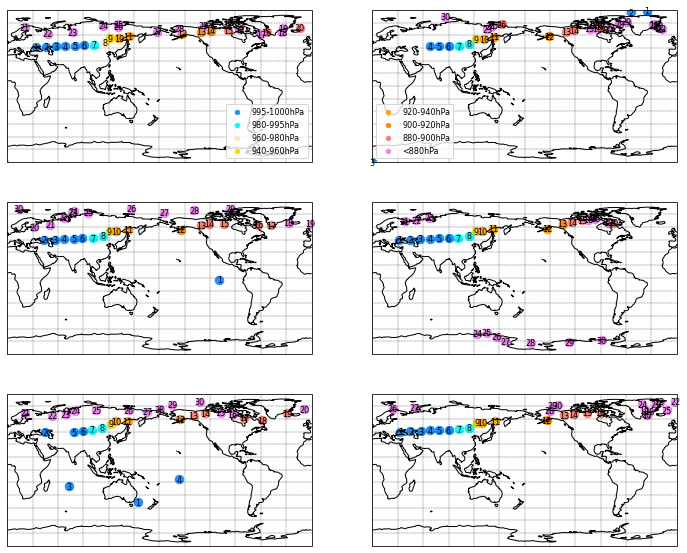

In [222]:
# Question 5
# Plot Location of Pressure Minimum
Fig = pyplot.figure(figsize=(12,10))
Count = 0
for Model in list(Models):
    print (Model)
    Count += 1
    Axes = Fig.add_subplot(3,2, Count, projection=ccrs.PlateCarree(central_longitude=180))
#
# Draw Coastlines
    Axes.coastlines()
#
# Draw Trajectory of Pressure Minimum
    for i in range(len(Colour_List)):
        Min_Pressure_Lat_Lon, Colour_List = Min_Pressure_Location(Model, Count-1)
        Axes.scatter(Min_Pressure_Lat_Lon[2][i], Min_Pressure_Lat_Lon[1][i], c=Colour_List[i], s=72)
# Label Points
        Axes.text(Min_Pressure_Lat_Lon[2][i], Min_Pressure_Lat_Lon[1][i], str(i+1), ha='center', va='center', \
        fontdict={'size':8}, color='black')
#
# Set Axis Labels
    x_Axis = numpy.arange(-180,180,30)
    y_Axis = numpy.arange(-90,90,15)
    pyplot.xlim(-180,180)
    pyplot.ylim(-90,90)
#
# Add Gridline
    Gridline = Axes.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Add Legend For Colour Codes
    if Model == "FV3":
        pyplot.scatter(-182, -90, s=18, c='dodgerblue', label="995-1000hPa")
        pyplot.scatter(-182, -90, s=18, c='aqua', label="980-995hPa")
        pyplot.scatter(-182, -90, s=18, c='moccasin', label="960-980hPa")
        pyplot.scatter(-182, -90, s=18, c='gold', label="940-960hPa")
        pyplot.legend(loc=4, fontsize=8)
    if Model == "MPAS":
        pyplot.scatter(-182, -90, s=18, c='orange', label="920-940hPa")
        pyplot.scatter(-182, -90, s=18, c='darkorange', label="900-920hPa")
        pyplot.scatter(-182, -90, s=18, c='salmon', label="880-900hPa")
        pyplot.scatter(-182, -90, s=18, c='violet', label="<880hPa")
        pyplot.legend(loc=3, fontsize=8)
#    
#        Cax = Axes.inset_axes([0.75, -0.08, 0.8, 0.06], transform=Axes.transAxes)
#        Fig.colorbar(Colour_Plot, ax=Axes, cax=Cax, orientation='horizontal')
Fig.savefig('Q5.png', bbox_inches='tight')